# Exercise 5
## Dataset: **MIMIC-III** (Medical Information Mart for Intensive Care III)
- The dataset is publicly available but requires researchers to sign a data use agreement due to the sensitive nature of medical data. It is released under the [Health Insurance Portability and Accountability Act (HIPAA)](https://www.hhs.gov/hipaa/index.html).

In [1]:
import pandas as pd

# Load the dataset into a pandas DataFrame
admissions_df = pd.read_csv('ADMISSIONS.csv')

# Display the first few rows of the dataset to verify it loaded correctly
print(admissions_df.head())

   row_id  subject_id  hadm_id            admittime            dischtime  \
0   12258       10006   142345  2164-10-23 21:09:00  2164-11-01 17:15:00   
1   12263       10011   105331  2126-08-14 22:32:00  2126-08-28 18:59:00   
2   12265       10013   165520  2125-10-04 23:36:00  2125-10-07 15:13:00   
3   12269       10017   199207  2149-05-26 17:19:00  2149-06-03 18:42:00   
4   12270       10019   177759  2163-05-14 20:43:00  2163-05-15 12:00:00   

             deathtime admission_type         admission_location  \
0                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1  2126-08-28 18:59:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
2  2125-10-07 15:13:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
4  2163-05-15 12:00:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

  discharge_location insurance language  religion marital_status  \
0   HOME HEALTH CARE  Medicare      NaN  CATHOLIC      SEPARATED  

In [2]:
# Generate descriptive statistics for numerical columns
numerical_stats = admissions_df.describe()

# Check for missing values
missing_values = admissions_df.isnull().sum()

numerical_stats, missing_values

(             row_id    subject_id        hadm_id  hospital_expire_flag  \
 count    129.000000    129.000000     129.000000            129.000000   
 mean   28036.441860  28010.410853  152343.441860              0.310078   
 std    14036.548988  16048.502883   27858.788248              0.464328   
 min    12258.000000  10006.000000  100375.000000              0.000000   
 25%    12339.000000  10088.000000  128293.000000              0.000000   
 50%    39869.000000  40310.000000  157235.000000              0.000000   
 75%    40463.000000  42135.000000  174739.000000              1.000000   
 max    41092.000000  44228.000000  199395.000000              1.000000   
 
        has_chartevents_data  
 count            129.000000  
 mean               0.992248  
 std                0.088045  
 min                0.000000  
 25%                1.000000  
 50%                1.000000  
 75%                1.000000  
 max                1.000000  ,
 row_id                   0
 subject_id    

From the descriptive statistics, we can see that the `hospital_expire_flag` column, which indicates whether the patient expired in the hospital, has a mean of approximately 0.31. This suggests that about 31% of the admissions in this dataset resulted in the patient's death in the hospital. The `has_chartevents_data` column has a mean of approximately 0.99, indicating that chart events data is available for about 99% of the admissions.

The missing values count shows that there are missing values in the `deathtime`, `language`, and `religion` columns. The `deathtime` column has 89 missing values, which is expected as not all admissions result in the patient's death. The `language` column has 48 missing values, and the `religion` column has 1 missing value. These missing values may need to be addressed depending on the specific analysis to be performed on the data.

Next, let's visualize some of the data to gain further insights. We'll create a bar plot of the `admission_type` column to see the distribution of admission types

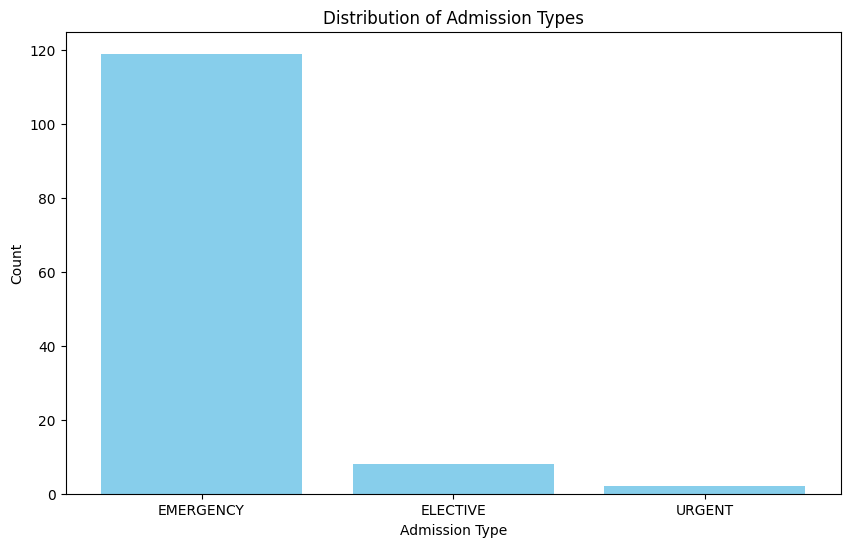

In [3]:
import matplotlib.pyplot as plt

# Create a bar plot of the 'admission_type' column
counts = admissions_df['admission_type'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Distribution of Admission Types')
plt.show()

From this plot, we can see that **EMERGENCY** is the most common admission type, followed by **ELECTIVE** and **URGENT**.

Here is the average duration of the hospital stay for each admission type:

In [4]:

# Convert 'admittime' and 'dischtime' to datetime
admissions_df['admittime'] = pd.to_datetime(admissions_df['admittime'])
admissions_df['dischtime'] = pd.to_datetime(admissions_df['dischtime'])

# Calculate the duration of the hospital stay
admissions_df['stay_duration'] = (admissions_df['dischtime'] - admissions_df['admittime']).dt.total_seconds() / 86400  # convert to days

# Calculate the average stay duration for each admission type
average_stay_duration = admissions_df.groupby('admission_type')['stay_duration'].mean()

average_stay_duration

admission_type
ELECTIVE     11.668403
EMERGENCY     9.226932
URGENT        6.259375
Name: stay_duration, dtype: float64

As you can see, the average stay duration is longest for elective admissions, followed by emergency admissions, and then urgent admissions.

Here are the histograms showing the distribution of the duration of the hospital stay for each type of admission:

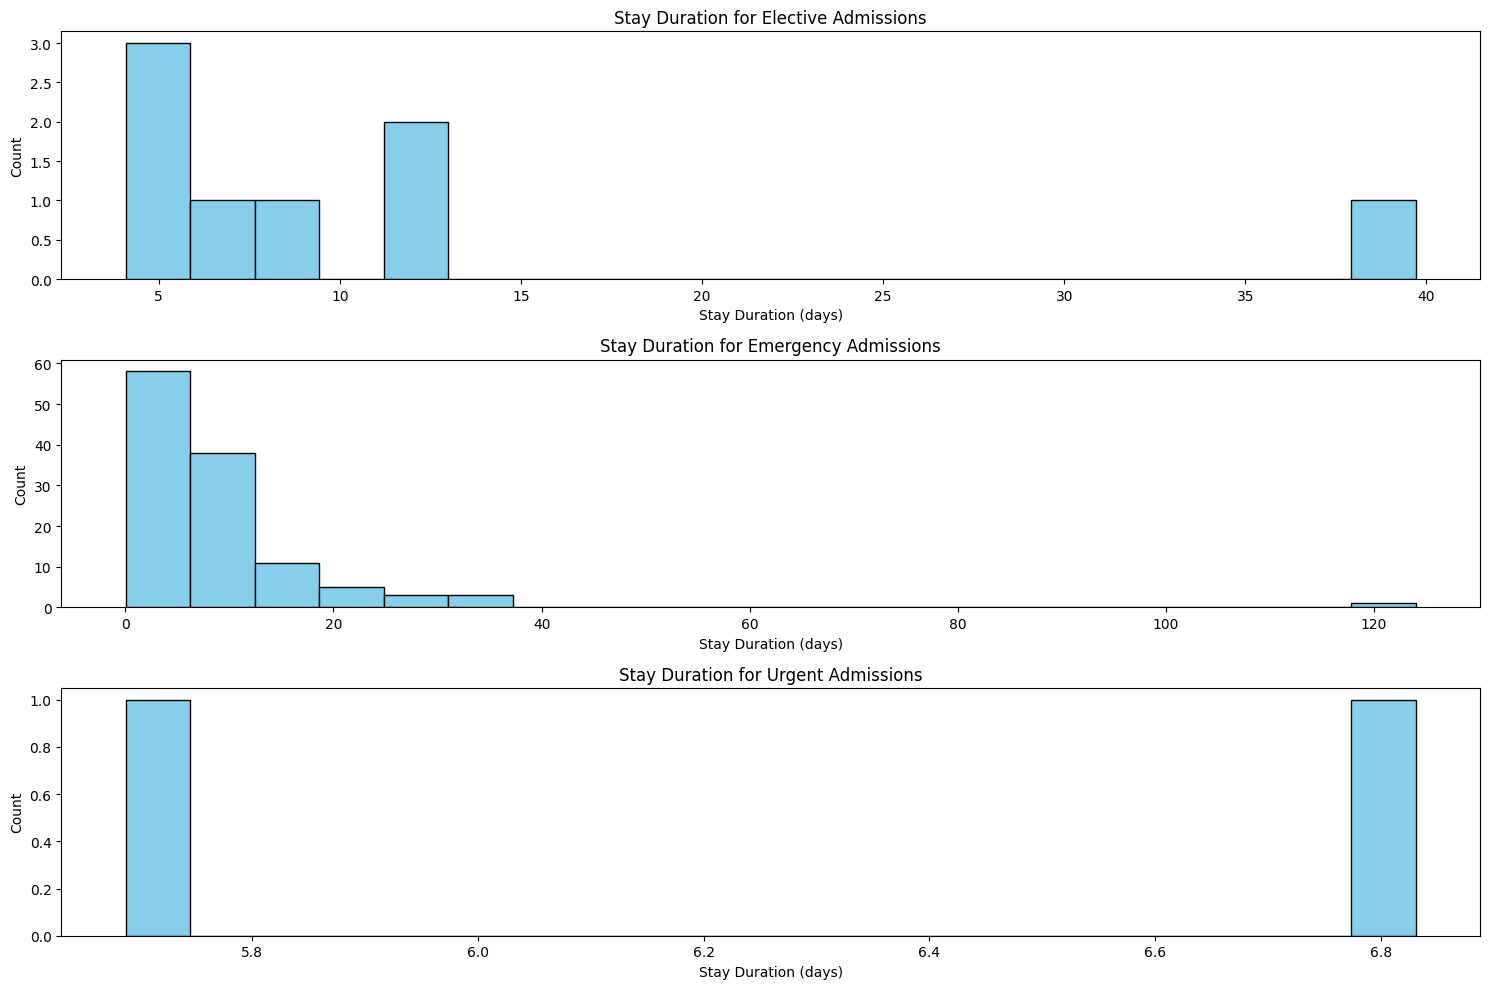

In [5]:
# Create histograms of the stay duration for each admission type
plt.figure(figsize=(15, 10))

# Elective admissions
plt.subplot(3, 1, 1)
plt.hist(admissions_df[admissions_df['admission_type'] == 'ELECTIVE']['stay_duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Stay Duration (days)')
plt.ylabel('Count')
plt.title('Stay Duration for Elective Admissions')

# Emergency admissions
plt.subplot(3, 1, 2)
plt.hist(admissions_df[admissions_df['admission_type'] == 'EMERGENCY']['stay_duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Stay Duration (days)')
plt.ylabel('Count')
plt.title('Stay Duration for Emergency Admissions')

# Urgent admissions
plt.subplot(3, 1, 3)
plt.hist(admissions_df[admissions_df['admission_type'] == 'URGENT']['stay_duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Stay Duration (days)')
plt.ylabel('Count')
plt.title('Stay Duration for Urgent Admissions')

plt.tight_layout()
plt.show()

From these histograms, we can see the distribution of stay durations for elective, emergency, and urgent admissions. The distributions are skewed to the right, indicating that most stays are relatively short, but there are a few longer stays that pull the mean to the right.

In terms of data cleaning, we identified earlier that there are missing values in the `deathtime`, `language`, and `religion` columns. Depending on the specific analysis to be performed on the data, these missing values may need to be addressed. For instance, if we are interested in analyzing the data by language or religion, we may want to fill in the missing values in these columns or exclude the rows with missing values from the analysis. The `deathtime` column has missing values for the admissions that did not result in the patient's death, so these missing values are expected and do not necessarily need to be filled in.

Let's fill the missing values in the `language` and `religion` columns with the most common value in each column. For the `deathtime` column, we'll leave the missing values as they are, since they provide meaningful information (i.e., the patient did not die during the admission)

In [6]:
# Fill missing values in the 'language' and 'religion' columns with the most common value
admissions_df['language'].fillna(admissions_df['language'].mode()[0], inplace=True)
admissions_df['religion'].fillna(admissions_df['religion'].mode()[0], inplace=True)

# Check for missing values again
cleaned_missing_values = admissions_df.isnull().sum()

cleaned_missing_values

row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                 0
religion                 0
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
stay_duration            0
dtype: int64